In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def plot_vector(p1,p2,num,dirn="other"):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    if num>4:
        w = 0.12/num
        h=0.9/num
    else:
        w = 0.03
        h=0.2
    
    if dirn=="up":
        colr="C8"
    elif dirn=="right":
        colr="C9"
    else:
        colr="k"
        
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    dx = dp[0]
    dy = dp[1]

    plt.arrow(p1[0], p1[1],
                 dx / 2, dy / 2,
                 width=w, head_width=h,
                 facecolor=colr,edgecolor =colr,
                 zorder=0)

    plt.arrow(p1[0] + dx / 2,
                 p1[1] + dy / 2,
                 dx / 2, dy / 2,
                 width=w, head_width=0,
                 facecolor=colr,edgecolor =colr,
                 zorder=0)

def plot_vector_old(p1,p2):
    '''
    DEPRECATED: As of 5th June 2020.
    Author: Siddharth Chaini
    ~Function Description~
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dp = p2-p1
    plt.quiver(p1[0], p1[1], dp[0], dp[1],angles='xy', scale_units='xy', scale=1, headwidth = 5, headlength = 7)

def get_coord_list(arr):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    coord_list=[]
    num = len(arr)
    for i in range(num):
        temp_coord = []
        for j in range(num):
            current_elems = arr[i][j]
            xpt = (num-1)-i
            ypt = j
            temp_coord.append((xpt,ypt))
        coord_list.append(temp_coord)
    return coord_list

def visualise_2d_model(arr,savefig=False,savename=".temp",show=True):
    '''
    Author: Siddharth Chaini
    ~Function Description~
    '''
    num = len(arr)
    if num<4:
        mksize = 35/num 
    else:
        mksize=(35/num)+0.5
    plt.axes().set_aspect('equal')
    coord_list = get_coord_list(arr)
    for i in range(num):
        for j in range(num):
            current_up_state = arr[i][j][0]
            current_right_state = arr[i][j][1]
            x_current = coord_list[i][j][1]
            y_current = coord_list[i][j][0]

            lower_neighbour_up_state = arr[(i+1)%num][j][0]
            x_up = coord_list[(i+1)%num][j][1]
            y_up = coord_list[(i+1)%num][j][0]

            left_neighbour_right_state = arr[i][j-1][1]
            x_left = coord_list[i][j-1][1]
            y_left = coord_list[i][j-1][0]


            current_down_state = -(lower_neighbour_up_state)
            current_left_state = -(left_neighbour_right_state)

#             plt.plot(x_current,y_current,'ob')
            
            plt.plot(x_current,y_current,
                        marker="o", markersize=mksize, markeredgecolor="k",
                        markerfacecolor="k",
                        zorder=1)

            if current_up_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current+1],num,"up")
            elif current_up_state == -1:
                plot_vector([x_current,y_current+1],[x_current,y_current],num,"up")

            if current_right_state == 1:
                plot_vector([x_current,y_current],[x_current+1,y_current],num,"right")
            elif current_right_state == -1:
                plot_vector([x_current+1,y_current],[x_current,y_current],num,"right")

            if current_down_state == 1:
                plot_vector([x_current,y_current],[x_current,y_current-1],num,"up")
            elif current_down_state == -1:
                plot_vector([x_current,y_current-1],[x_current,y_current],num,"up")

            if current_left_state == 1:
                plot_vector([x_current,y_current],[x_current-1,y_current],num,"right")
            elif current_left_state == -1:
                plot_vector([x_current-1,y_current],[x_current,y_current],num,"right")
    plt.xlim(-1,num)
    plt.ylim(-1,num)
    plt.axis('off')
    if savefig:
        plt.savefig(f"{savename}.png",dpi=300)
    if show:
        plt.show()
    plt.close()

In [29]:
arr = np.array([[[1, 1],
        [-1, 1],
        [1, 1]],

       [[1, -1],
        [-1, 1],
        [1, -1]],

       [[1, 1],
        [1, -1],
        [-1, 1]]])


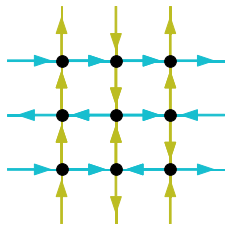

In [30]:
visualise_2d_model(arr,savefig=True,savename="Check.png")

In [31]:
def print_acche_se(arr):
    for elem1 in arr:
        for elem2 in elem1:
            print(f"[{elem2[0]},{elem2[1]}]",end=",\t")
        print()
        print()

In [33]:
print_acche_se(arr)

[1,1],	[-1,1],	[1,1],	

[1,-1],	[-1,1],	[1,-1],	

[1,1],	[1,-1],	[-1,1],	



\begin{pmatrix} [1,1]  & [-1,1] & [1,1]\\ [1,-1] & [-1,1] & [1,-1] \\ [1,1] & [1,-1] & [-1,1] \\ \end{pmatrix}
